#  Credit Card Default Payment Predictor

In [1]:
# Author Details
__author__ = "John Samson"
__email__ = "samson.john@gmail.com"

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# import warnings
# warnings.simplefilter(action = 'ignore', category = 'SettingWithCopyWarning')


In [2]:
df = pd.read_excel('credit_card_client_data.xls', header = 1)

#Creating a copy of initial dataframe
credit_df = df.copy()

In [3]:
# Cleaning/Renaming columns
credit_df.columns = [x.lower().replace(' ', '_') for x in credit_df.columns]
credit_df.rename({'pay_0' : 'pay_1', 'default_payment_next_month' : 'default', 'marriage' : 'marital_status'}, 
                 axis = 1, inplace = True)
credit_df.drop('id', axis = 1, inplace = True)
credit_df.columns

Index(['limit_bal', 'sex', 'education', 'marital_status', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   limit_bal       30000 non-null  int64
 1   sex             30000 non-null  int64
 2   education       30000 non-null  int64
 3   marital_status  30000 non-null  int64
 4   age             30000 non-null  int64
 5   pay_1           30000 non-null  int64
 6   pay_2           30000 non-null  int64
 7   pay_3           30000 non-null  int64
 8   pay_4           30000 non-null  int64
 9   pay_5           30000 non-null  int64
 10  pay_6           30000 non-null  int64
 11  bill_amt1       30000 non-null  int64
 12  bill_amt2       30000 non-null  int64
 13  bill_amt3       30000 non-null  int64
 14  bill_amt4       30000 non-null  int64
 15  bill_amt5       30000 non-null  int64
 16  bill_amt6       30000 non-null  int64
 17  pay_amt1        30000 non-null  int64
 18  pay_amt2        30000 non-

**Observation**
Since we have 30,000 row in our dataset, we see that there are no missing values.  Also, all the variables are labeled 'integers' but there are clearly some columns that are categorical.

In [5]:
credit_df.iloc[:, 0:11].describe()

,limit_bal,sex,education,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [6]:
credit_df.iloc[:, 11:].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Observations:**

- The columns 'education', and 'pay_number' have values that do not match the values stated in the data dictionary.  We will validate the data below.
- The 'bill_amt' columns have negative balances.  We will need to check the data to make sure negative values are appropriate.

## Data Validation

### 1) Education Column

In [7]:
credit_df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

The data dictionary states that this column can only have values 1, 2, 3, or 4.  For the values not in this list, we will group them in the 'Other' category (label 4).  

In [8]:
credit_df.loc[credit_df['education'].isin([0, 5, 6]), 'education'] = 4

# Checking to see if appropriate changes were made
credit_df['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

### 2) Pay_ Columns

In [9]:
for col in ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']:
    print(col)
    print(credit_df[col].value_counts(), '\n')

pay_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_1, dtype: int64 

pay_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: pay_2, dtype: int64 

pay_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: pay_3, dtype: int64 

pay_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: pay_4, dtype: int64 

pay_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: pay_5, dtype: int64 

pay_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: pay_6, dtype: int64 



**Observation:**
The data dictionary states that these columns should have a value greater than 0 or -1.  A number greater than 0 means that the individual is delaying payment for 'x' months (i.e. 2 = payment delay for 2 months).  We can safely assume that a number 0 or less means that the individual is making payments on time.  We will set all negative values equal to -1.

In [10]:
for col in ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']:
    credit_df[col] = credit_df[col].apply(lambda x: 0 if x <= 0 else x)
    print(col)
    print(credit_df[col].value_counts(), '\n')

pay_1
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: pay_1, dtype: int64 

pay_2
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: pay_2, dtype: int64 

pay_3
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: pay_3, dtype: int64 

pay_4
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
8        2
1        2
Name: pay_4, dtype: int64 

pay_5
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: pay_5, dtype: int64 

pay_6
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: pay_6, dtype: int64 



### 3) Marriage Column

In [11]:
credit_df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

**Observation:**
From the data dictionary, marriage labels should have only the values 1, 2, and 3.  The label 0 will be grouped with label 3 (other) to create consistent data.

In [12]:
credit_df['marital_status'] = credit_df['marital_status'].apply(lambda x: 3 if x == 0 else x)
credit_df['marital_status'].value_counts()

2    15964
1    13659
3      377
Name: marital_status, dtype: int64

### 4) Check Zero Values

We will check individuals who have zero balances or zero payments over this period.  These individuals might not be relevant in our analysis.

In [13]:
credit_df[(credit_df['bill_amt1'] == 0) & (credit_df['bill_amt2'] == 0) & (credit_df['bill_amt3'] == 0) & 
         (credit_df['bill_amt4'] == 0) & (credit_df['bill_amt5'] == 0) & (credit_df['bill_amt6'] == 0) & 
         (credit_df['pay_amt1'] == 0) & (credit_df['pay_amt2'] == 0) & (credit_df['pay_amt3'] == 0) & 
         (credit_df['pay_amt4'] == 0) & (credit_df['pay_amt5'] == 0) & (credit_df['pay_amt6'] == 0)]

# It looks like some individuals with no balance or no payment history of this time period have a payment delay of 1 month
# (pay_1 = 1).  This does not make sense because if the individual has a zero balance, no payments should be made.  In
# addition, some of these entries have a default label equal to 1.  We are not sure if not using your credit card results in
# defaulting on the card.  However, the inactivity on the card shows that we should drop these entires from our dataset.

,limit_bal,sex,education,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
18,360000,2,1,1,49,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,180000,2,1,2,29,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,210000,1,1,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
79,240000,2,2,2,44,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
121,450000,1,1,1,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29908,140000,1,1,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29909,360000,1,1,2,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29973,230000,1,2,1,35,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29979,180000,1,1,1,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Dropping unncessary rows

credit_df.drop(credit_df[(credit_df['bill_amt1'] == 0) & (credit_df['bill_amt2'] == 0) & (credit_df['bill_amt3'] == 0) & 
         (credit_df['bill_amt4'] == 0) & (credit_df['bill_amt5'] == 0) & (credit_df['bill_amt6'] == 0) & 
         (credit_df['pay_amt1'] == 0) & (credit_df['pay_amt2'] == 0) & (credit_df['pay_amt3'] == 0) & 
         (credit_df['pay_amt4'] == 0) & (credit_df['pay_amt5'] == 0) & (credit_df['pay_amt6'] == 0)].index,
            axis = 0, inplace = True)

credit_df #795 rows have been dropped

,limit_bal,sex,education,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### 4) Checking 'bill_amt' Columns

In [15]:
negative_bill_df = credit_df[(credit_df['bill_amt1'] < 0) | (credit_df['bill_amt2'] < 0) | (credit_df['bill_amt3'] < 0) |
                    (credit_df['bill_amt4'] < 0) | (credit_df['bill_amt5'] < 0) | (credit_df['bill_amt6'] < 0)]

negative_bill_df.iloc[:10, 6:25]

,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
7,0,0,0,0,0,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
26,0,0,0,0,0,-109,-425,259,-57,127,-189,0,1000,0,500,0,1000,1
35,0,0,0,0,0,30265,-131,-527,-923,-1488,-1884,131,396,396,565,792,0,0
37,0,0,0,0,0,15054,9806,11068,6026,-28335,18660,1500,1518,2043,0,47671,617,0
56,0,0,0,0,0,16386,15793,8441,7142,-679,8321,8500,1500,7500,679,9000,2000,0
68,0,0,0,2,0,-190,-9850,-9850,10311,10161,7319,0,0,20161,0,7319,13899,0
72,0,0,0,2,0,9076,5787,-684,5247,3848,3151,5818,15,9102,17,3165,1395,0
92,0,0,0,0,0,-2000,5555,0,0,0,0,7555,0,0,0,0,0,0
101,0,0,0,0,0,-81,-303,32475,32891,33564,34056,223,33178,1171,1197,1250,5000,0
109,0,0,0,0,0,-103,-103,-103,-103,-103,-103,0,0,0,0,0,0,0


**Observation:**
Looking at rows where a negative bill amount occurred, we see that there were overpayments based on the pay_amt columns.  This is a reason why negative bill_amt balances were seen the after the payment was made.  Therefore, a negative bill amount balance is not out of the ordinary.  

## Exploratory Data Analysis

In [16]:
# # Data Preprocessing
# cat_var = ['sex', 'education', 'marriage', 'pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
# num_var = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
#           'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
# target = ['default']

# for cat in cat_var:
#     credit_df[cat] = credit_df[cat].astype('category')

In [17]:
# combined = cat_var + num_var
# independent_var_df = credit_df[combined]
# dependent_var_df = credit_df[target]

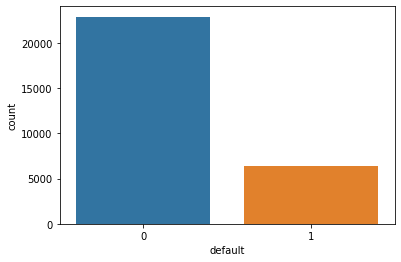

0    0.783017
1    0.216983
Name: default, dtype: float64

In [18]:
#Visualizing the target variable

sns.countplot(credit_df['default'])
plt.show()

credit_df['default'].value_counts(normalize = True)

**Observation:**
There is a clear imbalance in samples between individuals who paid next month and those who defaulted on payment.  We will need to address the imbalance when we start applying machine learning models.

In [19]:
def histograms_plot(df, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        df[feature].hist(bins = 20, ax = ax, facecolor = 'red')
        ax.set_title(' {} DISTRIBUTION'.format(feature.upper().replace('_', ' ')), fontsize = 14)

    fig.tight_layout()  
    plt.show()

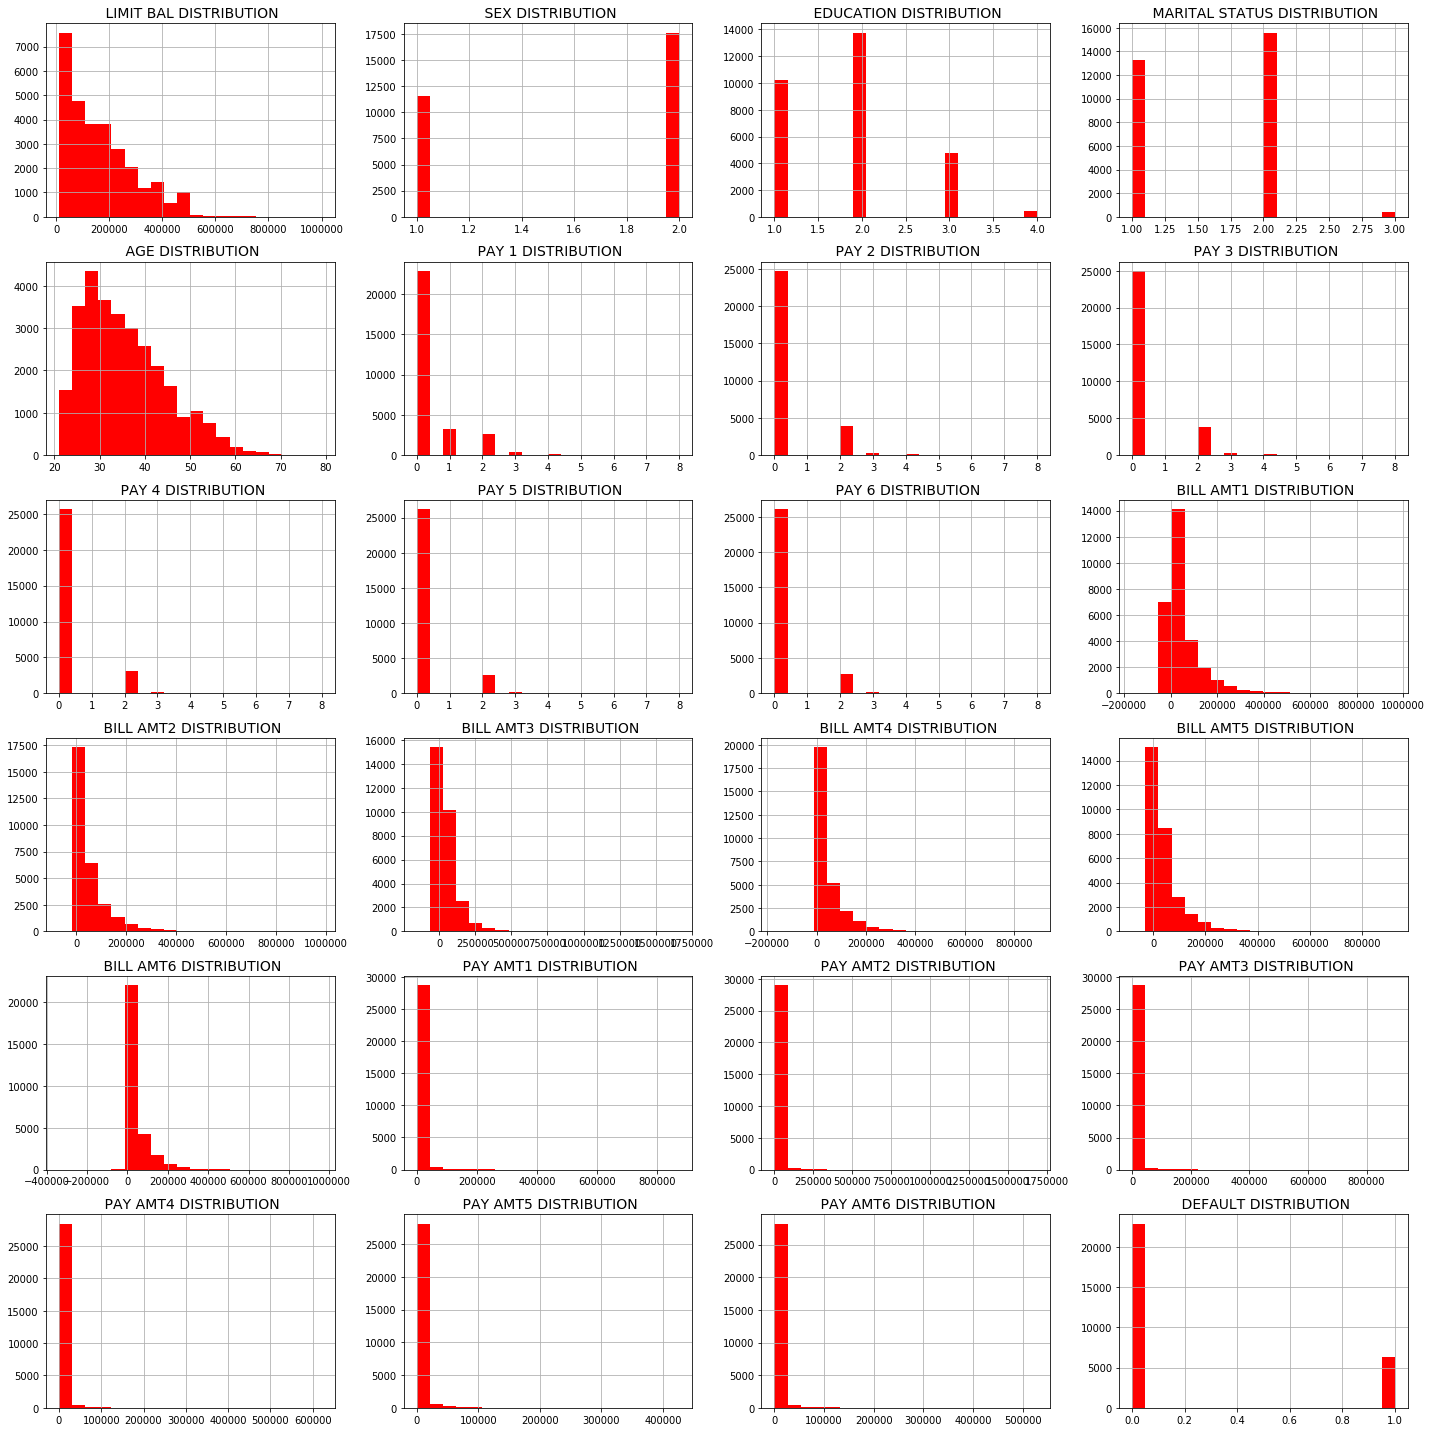

In [20]:
histograms_plot(credit_df, credit_df.columns, 6, 4)

**Observations:**

- There are generally more individuals with lower limit balances than those with higher limit balances
- Most individuals are between 25 and 30 years old.
- A majority of people have lower balance values (which is a good sign) and making smaller payments.

### Correlations with the Target Variable (Deafult)

In [21]:
# Defining function for frequency table:

def frequency_table(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2])
    table['{} percentage'.format(col2)] = round(table[table.columns[1]] / (table[table.columns[0]] + table[table.columns[1]]), 3)
    return table

In [22]:
# Gender freqeuncy table
frequency_table(credit_df, 'sex', 'default')

default,0,1,default percentage
sex,,,
1,8844,2751,0.237
2,14024,3586,0.204


*Label Definitions:* <br>
1 - Male <br>
2 - Female

**Observation:** A greater percentage of men default on their credit cards than women (about 3%).

In [23]:
frequency_table(credit_df, 'education', 'default')

default,0,1,default percentage
education,,,
1,8309,1880,0.185
2,10526,3241,0.235
3,3610,1183,0.247
4,423,33,0.072


*Label Definitions:* <br>
1 - Graduate School <br>
2 - University <br>
3 - High School <br>
4 - Other

**Observation:** The higher the education level, the less likely the individual will default.  The 'Other' label has the lowest default percentage but the sample size is too small to make an accurate prediction.

In [24]:
frequency_table(credit_df, 'marital_status', 'default')

default,0,1,default percentage
marital_status,,,
1,10197,3050,0.230
2,12387,3201,0.205
3,284,86,0.232


*Label Definitions:* <br>
1 - Married <br>
2 - Single <br>
3 - Other

**Observation:** Married couples have a higher chance of credit card default than single individuals.  The 'Other' lable has too small of a sample size to make an accurate prediction.

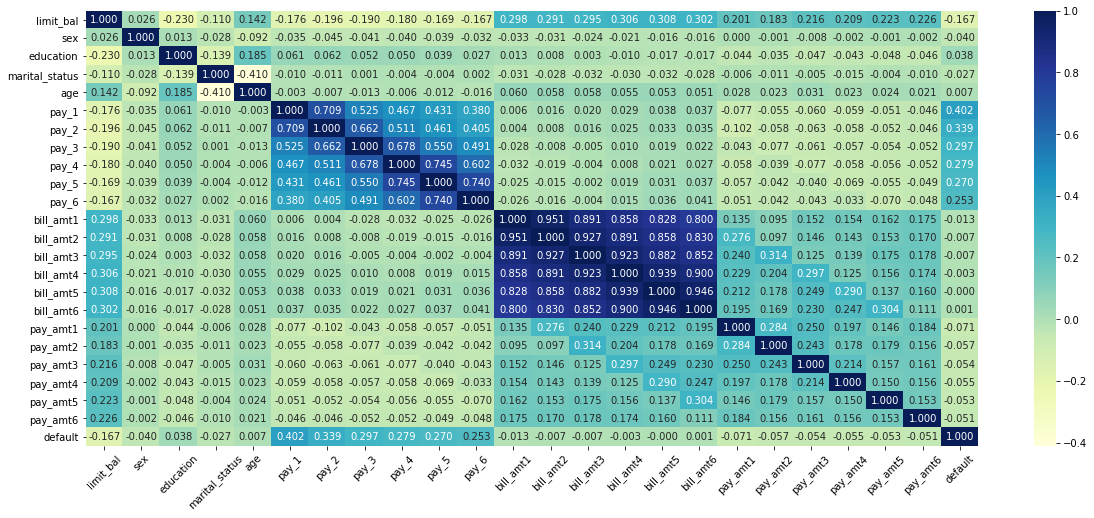

In [25]:
fig = plt.figure(figsize = (20, 8))
sns.heatmap(credit_df.corr(), cmap = 'YlGnBu', annot = True, fmt = '0.3f')
plt.xticks(rotation = 45)
plt.show()

**Observations:**

- The pay_, bill_amt, and pay_amt columns are all highly correlated with one another.  High correlation might not improve modeling so we might consider altering these columns to produce a metric that might be more relevant.
- The categorical variables (sex, education, and marriage) are not highly correlated with any other variable.  We might consider combining these features in a way to impact modeling.
- The target variable is signficantly correlated to the pay_ columns.  This makes sense because these columns indicate whether or not an individual has made timely payments, which can directly affect credit card defaulting.

### Creating a Baseline Model

In [66]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [27]:
# Creating a target dataframe
credit_target_df = credit_df['default'].copy()

# Creating a features dataframe
credit_features_df = credit_df[credit_df.columns.tolist()[:-1]].copy()

In [28]:
# Creating the train/test 
x_train, x_test, y_train, y_test = train_test_split(credit_features_df, credit_target_df, test_size = 0.20, 
                                                    random_state = 8, shuffle = True)

AUC Score = 0.6046
Accuracy Score = 0.7242
------------------------------


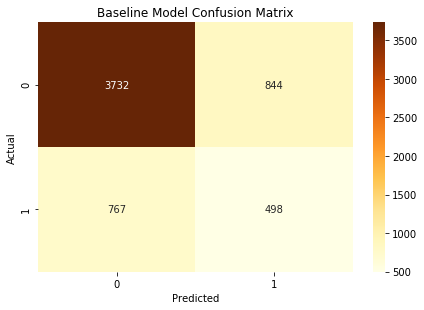

In [29]:
# Training a Decision Tree Model with all features
baseline_dt_clf = DecisionTreeClassifier()
baseline_dt_clf.fit(x_train, y_train)
baseline_dt_clf_roc_auc = roc_auc_score(y_test, baseline_dt_clf.predict(x_test))
baseline_dt_clf_accuracy = accuracy_score(y_test, baseline_dt_clf.predict(x_test))
print('AUC Score =', round(baseline_dt_clf_roc_auc, 4))
print('Accuracy Score =', round(baseline_dt_clf_accuracy, 4))
print('-'*30)

# Displaying a confusion matrix
confusion_matrix_baseline_dt_clf = confusion_matrix(y_test, baseline_dt_clf.predict(x_test))
sns.heatmap(pd.DataFrame(confusion_matrix_baseline_dt_clf), annot=True, cmap="YlOrBr", fmt='g')
plt.tight_layout()
plt.title('Baseline Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observation:** The baseline model shows an Area Under Curve value of 0.606 and an accuracy percentage of 72.32%.  These numbers can definitely be improved with feature engineering and model tuning.

**Key Issues:**

- Original sample did not address default imbalance.
- Some features might not bring any value to a model.

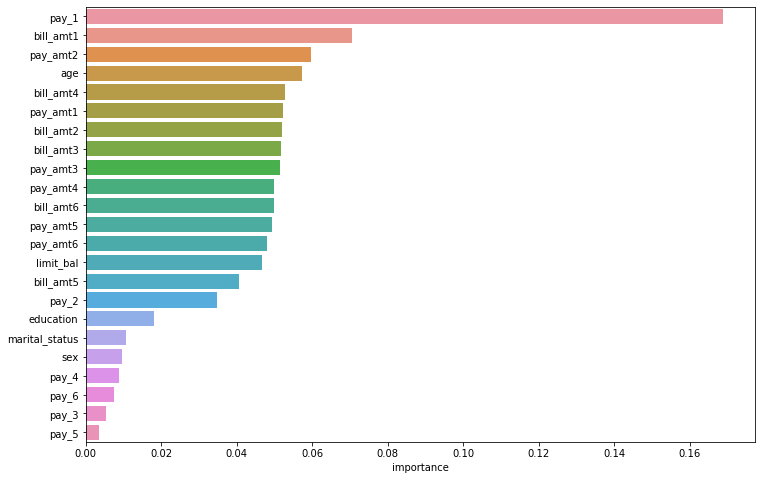

In [30]:
# Displaying Feature Importances
feature_importances_baseline_dt = pd.DataFrame(baseline_dt_clf.feature_importances_, index = x_train.columns,
                                              columns = ['importance']).sort_values('importance', ascending = False)
plt.figure(figsize = (12, 8))
sns.barplot(x = 'importance', y = feature_importances_baseline_dt.index,
            data = feature_importances_baseline_dt)
plt.show()

**Observations:**

- Pay_1 has the greatest importance in the baseline model.  This does makes sense because depending whether or not an individual has made a payment last month can be linked to that individual defaulting.
- Education, marriage, and sex are categorical variables that do not have much importance.  We can possibly combined these features together to see if they can become more important with other models.

## Feature Engineering

### 1) Addressing Education, Marriage Status, and Sex Attributes

Since these variables did not have much importance in the baseline model, we will combine them to see if they can improve our models.

In [42]:
# Combining sex, education, marital_status into one category (24 possible combinations)

credit_df['sex_marital_ed'] = 0
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 1)), 
              'sex_marital_ed'] = 1 
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 2)), 
              'sex_marital_ed'] = 2 
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 3)), 
              'sex_marital_ed'] = 3
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 4)), 
              'sex_marital_ed'] = 4

credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 1)), 
              'sex_marital_ed'] = 5 
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 2)), 
              'sex_marital_ed'] = 6 
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 3)), 
              'sex_marital_ed'] = 7
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 4)), 
              'sex_marital_ed'] = 8

credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 1)), 
              'sex_marital_ed'] = 9
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 2)), 
              'sex_marital_ed'] = 10 
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 3)), 
              'sex_marital_ed'] = 11
credit_df.loc[((credit_df['sex'] == 1) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 4)), 
              'sex_marital_ed'] = 12

credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 1)), 
              'sex_marital_ed'] = 13
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 2)), 
              'sex_marital_ed'] = 14 
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 3)), 
              'sex_marital_ed'] = 15
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 1) & (credit_df['education'] == 4)), 
              'sex_marital_ed'] = 16

credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 1)), 
              'sex_marital_ed'] = 17 
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 2)), 
              'sex_marital_ed'] = 18 
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 3)), 
              'sex_marital_ed'] = 19
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 2) & (credit_df['education'] == 4)), 
              'sex_marital_ed'] = 20

credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 1)), 
              'sex_marital_ed'] = 21
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 2)), 
              'sex_marital_ed'] = 22 
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 3)), 
              'sex_marital_ed'] = 23
credit_df.loc[((credit_df['sex'] == 2) & (credit_df['marital_status'] == 3) & (credit_df['education'] == 4)), 
              'sex_marital_ed'] = 24

# Summary of new attribute:
# 1 = male/married/graduate school
# 2 = male/married/university
# 3 = male/married/high school
# 4 = male/married/other
# 5 = male/single/graduate school
# 6 = male/single/university
# 7 = male/single/high school
# 8 = male/single/other
# 9 = male/other/graduate school
# 10 = male/other/university
# 11 = male/other/high school
# 12 = male/other/other
# 13 = female/married/graduate school
# 14 = female/married/university
# 15 = female/married/high school
# 16 = female/married/other
# 17 = female/single/graduate school
# 18 = female/single/university
# 19 = female/single/high school
# 20 = female/single/other
# 21 = female/other/graduate school
# 22 = female/other/university
# 23 = female/other/high school
# 24 = female/other/other

In [43]:
credit_df['sex_marital_ed'].value_counts().sort_index()

1     1613
2     2332
3     1019
4       80
5     2546
6     2903
7      874
8       85
9       31
10      63
11      47
12       2
13    1928
14    4360
15    1768
16     147
17    4050
18    4005
19     989
20     136
21      21
22     104
23      96
24       6
Name: sex_marital_ed, dtype: int64

### Resampling training and test set

In [47]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Upsampling the minority class
x_train_up, y_train_up = resample(x_train[y_train == 1], y_train[y_train == 1], replace = True,
                                  n_samples = x_train[y_train == 0].shape[0], random_state = 8)

x_train_up = pd.concat([x_train[y_train == 0], x_train_up])
y_train_up = pd.concat([y_train[y_train == 0], y_train_up])


# Upsampling with SMOTE
smote = SMOTE(random_state = 8)
x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)

# Downsampling the majority class
x_train_down, y_train_down = resample(x_train[y_train == 0], y_train[y_train == 0], replace = True, 
                                      n_samples = x_train[y_train == 1].shape[0], random_state = 8)

x_train_down  = pd.concat([x_train[y_train == 1], x_train_down])
y_train_down = pd.concat([y_train[y_train == 1], y_train_down])

In [49]:
# checking balance/imbalance of target variable for each sample
for sample in [y_train_up, y_train_smote, y_train_down]:
    print(sample.value_counts())
    
# Target variable has an equal number of instances for each sample

1    18292
0    18292
Name: default, dtype: int64
1    18292
0    18292
Name: default, dtype: int64
1    5072
0    5072
Name: default, dtype: int64


### Choosing the Right Sample

In [54]:
sampling_methods = {}
sampling_methods['original_sample'] = (x_train, y_train)
sampling_methods['upsample'] = (x_train_up, y_train_up)
sampling_methods['smote'] = (x_train_smote, y_train_smote)
sampling_methods['downsample'] = (x_train_down, y_train_down)

# Applying 10-fold cross validation for each sampling set and applying to a Logistic Regression model
for sample in sampling_methods.keys():
    results = cross_val_score(DecisionTreeClassifier(), sampling_methods[sample][0], 
                                           sampling_methods[sample][1], cv = 10, scoring = 'f1')
    print('F1 score for {}:'.format(sample))
    print(round(results.mean(), 4))

F1 score for original_sample:
0.3982
F1 score for upsample:
0.9034
F1 score for smote:
0.7556
F1 score for downsample:
0.6553


**Observation:** It looks like upsampling works best with our data.  We will use these samples for model fitting and testing.

AUC Score = 0.6053
Accuracy Score = 0.7324
------------------------------


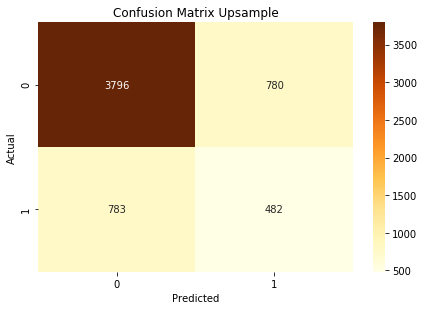

In [59]:
# Training a Decision Tree Model with all features (upsample)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train_up, y_train_up)
dt_clf_roc_auc = roc_auc_score(y_test, dt_clf.predict(x_test))
dt_clf_accuracy = accuracy_score(y_test, dt_clf.predict(x_test))
print('AUC Score =', round(dt_clf_roc_auc, 4))
print('Accuracy Score =', round(dt_clf_accuracy, 4))
print('-'*30)

# Displaying a confusion matrix
confusion_matrix_dt_clf = confusion_matrix(y_test, dt_clf.predict(x_test))
sns.heatmap(pd.DataFrame(confusion_matrix_dt_clf), annot=True, cmap="YlOrBr", fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix Upsample')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [70]:
models = []
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier(n_jobs = -1, random_state = 8)))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
models.append(('KNeighbors Classifier', KNeighborsClassifier(n_jobs = -1)))

# Initiating a dataframe to store results
models_dataframe = pd.DataFrame(columns = ['Model', 'F1 Mean', 'Accuracy Mean', 'AUC ROC Mean'])

# Initating counter for loop
i = 0

for name, model in models:
    k_fold = KFold(n_splits = 10, random_state = 8, shuffle = True)
    cross_val_f1 = cross_val_score(model, x_train_smote, y_train_smote, cv = k_fold, scoring = 'f1')
    cross_val_accuracy = cross_val_score(model, x_train_smote, y_train_smote, cv = k_fold, scoring = 'accuracy')
    cross_val_auc = cross_val_score(model, x_train_smote, y_train_smote, cv = k_fold, scoring = 'roc_auc')
    models_dataframe.loc[i] = [name,
                               round(cross_val_f1.mean(), 4),
                               round(cross_val_accuracy.mean(), 4),
                               round(cross_val_auc.mean(), 4)]
    i += 1

models_dataframe

,Model,F1 Mean,Accuracy Mean,AUC ROC Mean
0,Decision Tree Classifier,0.7608,0.7572,0.7571
1,Random Forest Classifier,0.8498,0.8520,0.9255
2,Gradient Boosting Classifier,0.7735,0.7823,0.8618
3,Ada Boost Classifier,0.7568,0.7642,0.8407
4,KNeighbors Classifier,0.7835,0.7543,0.8423
